In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df = pd.read_csv('merged_data.csv')
print(df.head())

    State   District    Market    Commodity Variety Grade Arrival_Date  \
0  Odisha  Sambalpur  Kuchinda  Cauliflower   Other   FAQ   02/07/2024   
1  Odisha  Sambalpur  Kuchinda  Cauliflower   Other   FAQ   18/07/2024   
2  Odisha  Sambalpur  Kuchinda  Cauliflower   Other   FAQ   19/07/2024   
3  Odisha  Sambalpur  Kuchinda  Cauliflower   Other   FAQ   20/07/2024   
4  Odisha  Sambalpur  Kuchinda        Onion   Other   FAQ   09/07/2024   

   Min_Price  Max_Price  Modal_Price  Commodity_Code  
0     6800.0     7000.0       6900.0              34  
1     8000.0     8500.0       8300.0              34  
2     6000.0     7000.0       6500.0              34  
3     6000.0     7000.0       6500.0              34  
4     3600.0     4000.0       3700.0              23  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6078447 entries, 0 to 6078446
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   State           object 
 1   District        object 
 2   Market          object 
 3   Commodity       object 
 4   Variety         object 
 5   Grade           object 
 6   Arrival_Date    object 
 7   Min_Price       float64
 8   Max_Price       float64
 9   Modal_Price     float64
 10  Commodity_Code  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 510.1+ MB


In [4]:
df['State'].unique()

array(['Odisha', 'Madhya Pradesh', 'Assam', 'Haryana', 'Kerala',
       'Tamil Nadu', 'West Bengal', 'Himachal Pradesh', 'Telangana',
       'Bihar', 'Andhra Pradesh', 'Chattisgarh', 'Karnataka', 'Goa',
       'Maharashtra', 'Punjab', 'Jammu and Kashmir', 'Meghalaya',
       'Manipur', 'NCT of Delhi', 'Rajasthan', 'Uttrakhand', 'Nagaland',
       'Jharkhand', 'Uttar Pradesh', 'Gujarat', 'Tripura',
       'Andaman and Nicobar', 'Mizoram', 'Chandigarh'], dtype=object)

In [5]:
nullvalues = df.isnull().sum()
print(nullvalues)

State             0
District          0
Market            0
Commodity         0
Variety           0
Grade             0
Arrival_Date      0
Min_Price         0
Max_Price         0
Modal_Price       0
Commodity_Code    0
dtype: int64


In [6]:
df.pop('Grade')
df.pop('Commodity_Code')
df.pop('Market')
df.pop('Variety')
df

,State,District,Commodity,Arrival_Date,Min_Price,Max_Price,Modal_Price
0,Odisha,Sambalpur,Cauliflower,02/07/2024,6800.0,7000.0,6900.0
1,Odisha,Sambalpur,Cauliflower,18/07/2024,8000.0,8500.0,8300.0
2,Odisha,Sambalpur,Cauliflower,19/07/2024,6000.0,7000.0,6500.0
3,Odisha,Sambalpur,Cauliflower,20/07/2024,6000.0,7000.0,6500.0
4,Odisha,Sambalpur,Onion,09/07/2024,3600.0,4000.0,3700.0
...,...,...,...,...,...,...,...
6078442,Haryana,Bhiwani,Maize,29/07/2024,2300.0,2340.0,2320.0
6078443,Haryana,Bhiwani,Maize,21/08/2024,2300.0,2300.0,2300.0
6078444,Haryana,Bhiwani,Bajra(Pearl Millet/Cumbu),04/11/2024,2625.0,2625.0,2625.0
6078445,Haryana,Bhiwani,Cotton,11/11/2024,7200.0,7300.0,7250.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6078447 entries, 0 to 6078446
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   State         object 
 1   District      object 
 2   Commodity     object 
 3   Arrival_Date  object 
 4   Min_Price     float64
 5   Max_Price     float64
 6   Modal_Price   float64
dtypes: float64(3), object(4)
memory usage: 324.6+ MB


In [8]:
df.describe()

,Min_Price,Max_Price,Modal_Price
count,6.078447e+06,6.078447e+06,6.078447e+06
mean,3.922288e+03,4.896489e+03,4.434035e+03
std,1.190742e+04,2.288408e+04,1.435134e+04
min,0.000000e+00,0.000000e+00,7.000000e-02
25%,1.354000e+03,1.800000e+03,1.600000e+03
50%,2.400000e+03,3.000000e+03,2.700000e+03
75%,4.025000e+03,5.000000e+03,4.715000e+03
max,4.000000e+06,4.000000e+06,4.000000e+06


In [9]:
df['State'].describe()

count     6078447
unique         30
top        Kerala
freq       656879
Name: State, dtype: object

In [10]:
# Convert 'Arrival_Date' to datetime format
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], format='%d/%m/%Y')

# Creating month and year columns
df['Month'] = df['Arrival_Date'].dt.month
df['Year'] = df['Arrival_Date'].dt.year

print(df)

           State   District                  Commodity Arrival_Date  \
0         Odisha  Sambalpur                Cauliflower   2024-07-02   
1         Odisha  Sambalpur                Cauliflower   2024-07-18   
2         Odisha  Sambalpur                Cauliflower   2024-07-19   
3         Odisha  Sambalpur                Cauliflower   2024-07-20   
4         Odisha  Sambalpur                      Onion   2024-07-09   
...          ...        ...                        ...          ...   
6078442  Haryana    Bhiwani                      Maize   2024-07-29   
6078443  Haryana    Bhiwani                      Maize   2024-08-21   
6078444  Haryana    Bhiwani  Bajra(Pearl Millet/Cumbu)   2024-11-04   
6078445  Haryana    Bhiwani                     Cotton   2024-11-11   
6078446  Haryana    Bhiwani                     Cotton   2024-11-23   

         Min_Price  Max_Price  Modal_Price  Month  Year  
0           6800.0     7000.0       6900.0      7  2024  
1           8000.0     8500.0  

In [11]:
df

,State,District,Commodity,Arrival_Date,Min_Price,Max_Price,Modal_Price,Month,Year
0,Odisha,Sambalpur,Cauliflower,2024-07-02,6800.0,7000.0,6900.0,7,2024
1,Odisha,Sambalpur,Cauliflower,2024-07-18,8000.0,8500.0,8300.0,7,2024
2,Odisha,Sambalpur,Cauliflower,2024-07-19,6000.0,7000.0,6500.0,7,2024
3,Odisha,Sambalpur,Cauliflower,2024-07-20,6000.0,7000.0,6500.0,7,2024
4,Odisha,Sambalpur,Onion,2024-07-09,3600.0,4000.0,3700.0,7,2024
...,...,...,...,...,...,...,...,...,...
6078442,Haryana,Bhiwani,Maize,2024-07-29,2300.0,2340.0,2320.0,7,2024
6078443,Haryana,Bhiwani,Maize,2024-08-21,2300.0,2300.0,2300.0,8,2024
6078444,Haryana,Bhiwani,Bajra(Pearl Millet/Cumbu),2024-11-04,2625.0,2625.0,2625.0,11,2024
6078445,Haryana,Bhiwani,Cotton,2024-11-11,7200.0,7300.0,7250.0,11,2024


In [12]:
# Filter data by specific arrival date
arrival_date = '21-04-2020'
filtered_data = df[df['Arrival_Date'] == arrival_date]

# Group by state and commodity, then calculate the average price
average_prices = filtered_data.groupby(['State', 'Commodity'])['Max_Price'].mean().reset_index()

print(average_prices)

              State                 Commodity    Max_Price
0    Andhra Pradesh  Bengal Gram(Gram)(Whole)  4620.000000
1    Andhra Pradesh              Gur(Jaggery)  3466.666667
2    Andhra Pradesh                     Mango   933.333333
3    Andhra Pradesh       Paddy(Dhan)(Common)  1876.250000
4    Andhra Pradesh                    Tomato   613.333333
..              ...                       ...          ...
541     West Bengal                    Potato  1690.000000
542     West Bengal                      Rice  3450.000000
543     West Bengal          Ridgeguard(Tori)  1935.714286
544     West Bengal             Sweet Pumpkin  1466.666667
545     West Bengal                    Tomato  1262.500000

[546 rows x 3 columns]


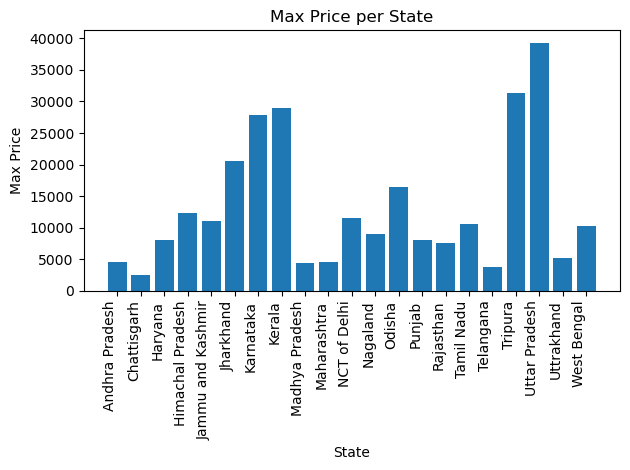

In [13]:
plt.bar(average_prices.State, average_prices.Max_Price) # Plotting for all states
plt.xlabel("State")
plt.ylabel("Max Price")
plt.title("Max Price per State")
plt.xticks(rotation=90, ha='right') # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout
plt.show()

In [14]:
monthly_price_range_df = df.groupby(['State', 'Commodity', 'Year', 'Month']).agg({'Min_Price': 'min', 'Max_Price': 'max'}).reset_index()
print(monthly_price_range_df)
monthly_price_range_df.to_csv('price_prediction.csv', index=False)

                     State   Commodity  Year  Month  Min_Price  Max_Price
0      Andaman and Nicobar  Amaranthus  2019      3     1500.0     8000.0
1      Andaman and Nicobar  Amaranthus  2019      4     1500.0     6000.0
2      Andaman and Nicobar  Amaranthus  2019      5     2000.0     4000.0
3      Andaman and Nicobar  Amaranthus  2019      6     2000.0     3000.0
4      Andaman and Nicobar  Amaranthus  2019      7     4000.0     8000.0
...                    ...         ...   ...    ...        ...        ...
88342          West Bengal       Wheat  2024     10     2600.0     2900.0
88343          West Bengal       Wheat  2024     11     2700.0     3300.0
88344          West Bengal       Wheat  2024     12     2900.0     6000.0
88345          West Bengal       Wheat  2025      1     2500.0     3200.0
88346          West Bengal       Wheat  2025      2     2800.0     3300.0

[88347 rows x 6 columns]


In [15]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['State'] = label_encoder.fit_transform(df['State'])
df['Commodity'] = label_encoder.fit_transform(df['Commodity'])

print(df)

         State   District  Commodity Arrival_Date  Min_Price  Max_Price  \
0           21  Sambalpur         56   2024-07-02     6800.0     7000.0   
1           21  Sambalpur         56   2024-07-18     8000.0     8500.0   
2           21  Sambalpur         56   2024-07-19     6000.0     7000.0   
3           21  Sambalpur         56   2024-07-20     6000.0     7000.0   
4           21  Sambalpur        197   2024-07-09     3600.0     4000.0   
...        ...        ...        ...          ...        ...        ...   
6078442      8    Bhiwani        173   2024-07-29     2300.0     2340.0   
6078443      8    Bhiwani        173   2024-08-21     2300.0     2300.0   
6078444      8    Bhiwani         21   2024-11-04     2625.0     2625.0   
6078445      8    Bhiwani         81   2024-11-11     7200.0     7300.0   
6078446      8    Bhiwani         81   2024-11-23     6800.0     6800.0   

         Modal_Price  Month  Year  
0             6900.0      7  2024  
1             8300.0      7

In [16]:
# Filter data for the commodity and time interval
commodity = 'Wheat'
start_date = '01-01-2006'
end_date = '02-01-2007'

filtered_df = df[(df['Commodity'] == commodity) & (df['Arrival_Date'] >= start_date) & (df['Arrival_Date'] <= end_date)]

# Group by district and date to get average price per day
daily_avg_df = filtered_df.groupby(['District', 'Arrival_Date','State']).mean(numeric_only=True).reset_index()

# Aggregate by state to get average price for the time interval
state_avg_price = daily_avg_df.groupby('State')['Max_Price'].mean().reset_index()

print(state_avg_price)


Empty DataFrame
Columns: [State, Max_Price]
Index: []


In [17]:
# Filter data for the commodity and time interval
commodity = 'Wheat'
start_date = '01-01-2019'
end_date = '02-01-2021'

filtered_df = df[(df['Commodity'] == commodity) & (df['Arrival_Date'] >= start_date) & (df['Arrival_Date'] <= end_date)]

# Group by district and date to get average price per day
daily_avg_df = filtered_df.groupby(['District', 'Arrival_Date','State']).mean(numeric_only=True).reset_index()

# Aggregate by state to get average price for the time interval
state_avg_price = daily_avg_df.groupby('State')['Min_Price'].mean().reset_index()

print(state_avg_price)


Empty DataFrame
Columns: [State, Min_Price]
Index: []


In [18]:

# Filter data for the commodity and time interval
commodity = 'Wheat'
start_date = '01-01-2006'
end_date = '02-01-2007'

filtered_df = df[(df['Commodity'] == commodity) & (df['Arrival_Date'] >= start_date) & (df['Arrival_Date'] <= end_date)]

# Group by district and date to get average price per day
daily_avg_df = filtered_df.groupby(['District', 'Arrival_Date','State']).mean(numeric_only=True).reset_index()

# Aggregate by state to get average price for the time interval
state_avg_price = daily_avg_df.groupby(['State','Min_Price'])['Max_Price'].mean().reset_index()

print(state_avg_price)



Empty DataFrame
Columns: [State, Min_Price, Max_Price]
Index: []


In [19]:
state_avg_price.head(10)

,State,Min_Price,Max_Price


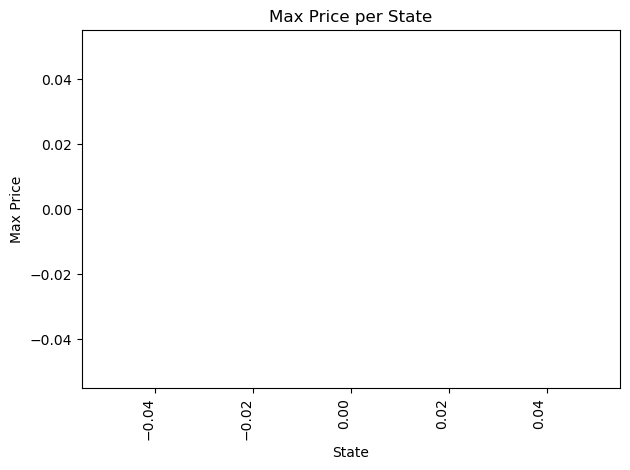

In [20]:
plt.plot(state_avg_price.State, state_avg_price.Max_Price)
plt.plot(state_avg_price.State, state_avg_price.Min_Price)# Plotting for all states
plt.xlabel("State")
plt.ylabel("Max Price")
plt.title("Max Price per State")
plt.xticks(rotation=90, ha='right') # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout
plt.show()